In [5]:
import sys
import pandas as pd
from bokeh.io import output_notebook
from matplotlib import rcParams
#rcParams['font.family'] = 'Times New Roman'
#rcParams['font.size'] = '12'
#rcParams['pdf.fonttype'] = 42
#rcParams['ps.fonttype'] = 

sys.path.append('..')
from models.Fleet import  from_xml
output_notebook()

instance_folder = '../data/instances/'
opt_res_folder = '../data/instances/c25cs3_20x20km/2/15-07-2020_21-36-25_FEASIBLE_ASSIGNED/'

fleet = from_xml(f'{instance_folder}c25cs3_20x20km.xml', assign_customers=False)
fleet_size = len(fleet.vehicles)

routes = {}
for i in range(fleet_size):
    ev_file = f'{opt_res_folder}/EV{i}_operation.csv'
    df = pd.read_csv(ev_file)
    Sk = tuple(df['Sk'])
    Lk = tuple(df['Lk'])
    x1_0 = df['x1_reaching'].iloc[0]
    x2_0 = df['x2_reaching'].iloc[0]
    x3_0 = df['x3_reaching'].iloc[0]
    routes[i] = ((Sk, Lk), x1_0, x2_0, x3_0)

fleet.set_routes_of_vehicles(routes)
fleet.create_optimization_vector()
fleet.plot_operation()

#plots = fleet.plot_operation_pyplot(label_offset=(.05, -7), fig_size=(16,4), save_to=opt_res_folder+'/')

Loading BokehJS ...

In [8]:
import matplotlib.pyplot as plt

folder = '../data/GA_implementation_xml/35C_2CS_1D_3EV_4CAP/'
folder_opt = '24-05-2020_16-07-38_FEASIBLE_ASSIGNED/'
file_path = folder + folder_opt + 'nodes_occupation.csv'
fig_path = folder + folder_opt + 'occupation1_legend.pdf'
df = pd.read_csv(file_path)
plot = df[['36', '37']].plot(yticks=[0,1,2], figsize=(3.2,3), legend=False)
plt.grid(axis='y')
plt.xlabel(r'Event $\bar{k}$')
plt.ylabel(r'Number of EVs')
plt.title('Max. capacity = 3')
plt.legend(('CS 36', 'CS 37'), loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(fig_path)

FileNotFoundError: [Errno 2] File ../data/GA_implementation_xml/35C_2CS_1D_3EV_4CAP/24-05-2020_16-07-38_FEASIBLE_ASSIGNED/nodes_occupation.csv does not exist: '../data/GA_implementation_xml/35C_2CS_1D_3EV_4CAP/24-05-2020_16-07-38_FEASIBLE_ASSIGNED/nodes_occupation.csv'

(<Figure size 432x288 with 1 Axes>,
 <networkx.classes.digraph.DiGraph at 0x20c73fc0d48>)

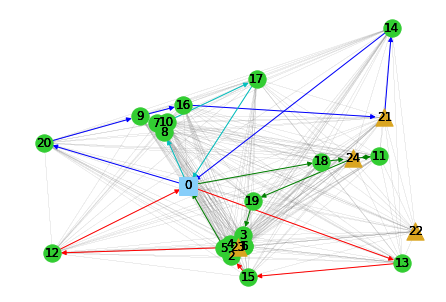

In [14]:
fleet.draw_operation(color_route=('r', 'b', 'g', 'c', 'y'), save_to=None, width=0.02, edge_color='grey', 
                     markeredgecolor='black', markeredgewidth=2.0)